# multiclass classification


In [235]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [234]:
def softmax(v):
    return np.exp(v) / np.sum(np.exp(v))

In [356]:
# y: vector
def one_hot_encoder(y):
    num_data = y.size
    num_class = np.max(y) + 1
    Y_one_hot = np.zeros((num_data, num_class))
    Y_one_hot[np.arange(num_data), y] = 1
    return (Y_one_hot, num_class)

In [233]:
# scalar
def cost(X, Y, W):
    wx = np.dot(W, X.T) # k x m
    normal_each_example = sum(np.exp(wx)) # 1 x m
    hot_wx = wx * Y.T # k x m
    numerators = sum(np.exp(hot_wx)) # 1 x m
    pi_of_hot_class = numerators / normal_each_example # 1 x m
    return -sum(np.log(pi_of_hot_class))

def cost_2(X, Y, W):
    wx = np.dot(W, X.T) # k x m
    e1 = -np.sum(wx * Y.T) # scalar
    s_each_example = np.sum(np.exp(wx), axis = 0) # 1 x m
    e2 = +sum(np.log(s_each_example)) # scalar
    return e1 + e2

In [257]:
# matrix, its dimension = dim W (k x (n + 1))
def grad_cost(X, Y, W):
    wx = np.dot(W, X.T) # k x m
    exp_wx = np.exp(wx) # k x m
    normal_each_example = sum(exp_wx) # 1 x m
    pi_matrix = exp_wx / normal_each_example # k x m, columnwise div
    return np.dot((pi_matrix - Y.T), X)

In [322]:
def gradient_decent(X, Y, W, cost_func, grad_cost_func, step, alpha, epsilon):
    costList = []
    accuracyList = []
    for i in range(step):
        costList.append(cost_func(X, Y, W))
        accuracyList.append(accuracy(X, Y, W, classify))
        grad = grad_cost_func(X, Y, W)
        W = W - alpha * grad
    plt.plot(costList)
    plt.show()
    plt.plot(accuracyList)
    plt.show()
    return W

In [236]:
def classify(W, X):
    wx = np.dot(X, W.T) # m x k
    return np.argmax(wx, axis = 1) # m x 1

In [237]:
# x: examples
# y: classes
def plot_scatter_2d(x, y, i, j, feature_names = []):
    for k in np.unique(y):
        x_k = x[np.argwhere(y == k).flatten()]
        plt.scatter(x_k[:, i], x_k[:, j])
    if feature_names != []:
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
    plt.show()

In [287]:
def divide_training_test_data(X, Y, training_data_rate):
    y = np.argmax(Y, axis = 1)
    (num_data, num_feature) = X.shape
    num_class = np.unique(y).size
    sort_indeces = np.arange(num_data)
    np.random.shuffle(sort_indeces)
    X_sorted = X[sort_indeces]
    Y_sorted = Y[sort_indeces]
    y_sorted = y[sort_indeces]
    X_train = np.empty((0, num_feature))
    Y_train = np.empty((0, num_class))
    X_test = np.empty((0, num_feature))
    Y_test = np.empty((0, num_class))
    for k in np.unique(y):
        indeces_k = np.argwhere(y == k).flatten()
        num_data_k = indeces_k.size
        X_k = X_sorted[indeces_k]
        Y_k = Y_sorted[indeces_k]
        num_train_data_k = np.floor(num_data_k * training_data_rate).astype(int)
        X_train = np.append(X_train, X_k[:num_train_data_k, :], axis = 0)
        Y_train = np.append(Y_train, Y_k[:num_train_data_k, :], axis = 0)
        X_test = np.append(X_test, X_k[num_train_data_k:, :], axis = 0)
        Y_test = np.append(Y_test, Y_k[num_train_data_k:, :], axis = 0)
    return (X_train, Y_train, X_test, Y_test)

In [305]:
def accuracy(X, Y, W, classify_func):
    classified = classify_func(W, X)
    is_true_list = classified == np.argmax(Y, axis = 1)
    return np.argwhere(is_true_list).size / is_true_list.size

In [346]:
def normalize(X):
    (num_data, num_feature) = X.shape
    mu_X = sum(X) / num_data
    sigma_X = sum((X - mu_X) ** 2) / num_data
    return (X - mu_X) / sigma_X

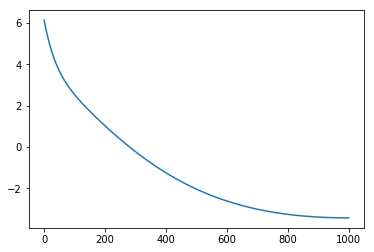

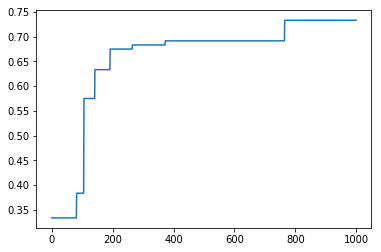

number of examples: m = 150
number of features: n = 1
number of classes: k = 3
accuracy of training data: 0.7333333333333333
accuracy of test data: 0.6333333333333333


In [367]:
# n: number of features
# m: number of examples
# k: number of classes
# X: m x (n + 1) matrix, each row is an example data, first column is bias (= 1)
# Y: m x k matrix
# W: k x (n + 1) matrix, parameters we want to know


iris = load_iris()
x = iris.data
y = iris.target

(m, n) = x.shape

#plot_scatter_2d(x, y, 2, 3, feature_names = iris.feature_names)

X = np.c_[np.ones((m, 1)), x]
#X = np.c_[np.ones((m, 1)), normalize(x)]
(Y, k) = one_hot_encoder(y)

# initial parameters
W = np.random.rand(k, n + 1) / 10

training_data_rate = 0.8
(X_train, Y_train, X_test, Y_test) = divide_training_test_data(X, Y, training_data_rate)

W = gradient_decent(X_train, Y_train, W, cost_func = cost, grad_cost_func = grad_cost, step = 1000, alpha = 0.0005, epsilon = 0)

accuracy_train = accuracy(X_train, Y_train, W, classify)
accuracy_test = accuracy(X_test, Y_test, W, classify)

print("=========================")
print("number of examples: m = {}".format(m))
print("number of features: n = {}".format(n))
print("number of classes: k = {}".format(k))
print("accuracy of training data: {}".format(accuracy_train))
print("accuracy of test data: {}".format(accuracy_test))